## Domain: Marketing 

ANALYSIS: A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
colors = ['mediumaquamarine', 'peachpuff', 'plum','hotpink',  'teal', 'darkturquoise', 'yellowgreen', 'darkseagreen']

In [3]:
import os
print(os.getcwd())

C:\Users\SarahRana\OneDrive - JCW Resourcing\Documents\Training Session docs\capstone\1582800386_project1datadictionary


In [4]:
absolutepath = os.path.abspath('data.xlsx')
print(absolutepath)

C:\Users\SarahRana\OneDrive - JCW Resourcing\Documents\Training Session docs\capstone\1582800386_project1datadictionary\data.xlsx


### Preliminary Analysis 

In [5]:
df=pd.read_excel('data.xlsx')

In [6]:
da=pd.read_excel('Country-Code.xlsx')

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

The summary of the data shows that there are a total of 9551 entries of data and 19 variables. From this, we can see that 'Restaurant Name' and 'Cuisines' have missing values.

Additionally, all the numerical variables have the correct datatype. 

In [9]:
df.Cuisines.isnull().sum()

9

The Cuisines column has a total of 9 missing entries.

In [10]:
df.duplicated().any()

False

The data doesn't have any duplicated entries.

#### * Inconsistent data entry check

In [11]:
df.City.unique()

array(['Jakarta', 'Tangerang', 'Bogor', 'Bandung', 'New Delhi',
       'Pasay City', 'Gurgaon', 'Colombo', 'Mandaluyong City', 'Agra',
       'Noida', 'Pretoria', 'Taguig City', 'Kanpur', 'Ghaziabad',
       'Jaipur', 'Bangalore', 'Chandigarh', 'Pune', 'Chennai', 'Goa',
       'Hyderabad', 'Indore', 'Lucknow', 'Ludhiana', 'Panchkula',
       'Ranchi', 'Faridabad', 'Kolkata', 'Ahmedabad', 'Aurangabad',
       'Bhopal', 'Mysore', 'Vizag', 'Guwahati', 'Dehradun', 'Mangalore',
       'Nagpur', 'Patna', 'Inner City', 'Bhubaneshwar', 'Coimbatore',
       'Kochi', 'Mumbai', 'Nashik', 'Puducherry', 'Surat', 'Vadodara',
       'Makati City', 'Tagaytay City', 'Amritsar', 'Pasig City',
       'Varanasi', 'San Juan City', 'Allahabad', 'Johannesburg',
       'Santa Rosa', 'Secunderabad', 'Quezon City', 'Cape Town', 'Mohali',
       'Doha', 'Sandton', 'Singapore', 'Abu Dhabi', 'Dubai', 'SÌ£o Paulo',
       'Ankara', 'BrasÌ_lia', 'Rio de Janeiro', 'Sharjah', 'London',
       'Wellington City', 'Randb

'SÌ£o Paulo','BrasÌ_lia' and '€¡stanbul' are not written correctly. 

In [12]:
df.replace(['SÌ£o Paulo','BrasÌ_lia','€¡stanbul'], ['Sao Paulo','Brasilia','Istanbul'], inplace=True)

In [13]:
df['Rating color'].unique()

array(['Green', 'Dark Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [14]:
df['Rating text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [15]:
df['Has Table booking'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

#### * Currency Variable

In [17]:
df.Currency.value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(å£)                  80
Rand(R)                     60
Emirati Diram(AED)          60
Brazilian Real(R$)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Sri Lankan Rupee(LKR)       20
Qatari Rial(QR)             20
Name: Currency, dtype: int64

To make fair comparisons between restaurants, the various currencies for the avarage price for 2 would have to be converted to the same curreny (convert all to Indian Rupees) 

In [18]:
da

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Though the 'Currency' column has 12 distinct currencies, we have to get 14 exchange rates as there are 14 countries, excluding India. 

##### Exchange Rates:
* Indian Rupees: US Dollar = 0.013
* Indian Rupees: Pound Sterling = 0.010
* Indian Rupees: UAE Dirham = 0.047
* Indian Rupees: Turkish Lira = 0.20
* Indian Rupees: Sri Lankan Rupee = 4.71
* Indian Rupees: South African Rand = 0.21
* Indian Rupees: Singapore Dollar = 0.018
* Indian Rupees: Qatar Rial = 0.047
* Indian Rupees: Philipines Botswanan Pula = 0.16
* Indian Rupees: New Zealand Dollar = 0.020
* Indian Rupees: Indonesian Rupiah = 189.09
* Indian Rupees: Canadian Dollar = 0.017
* Indian Rupees: Brazilian Real = 0.064
* Indian Rupees: Australian Dollar = 0.018 

In [19]:
# Add country column from Country-Code file to Data file based on country code
df=df.join(da.set_index('Country Code'), on='Country Code')

In [20]:
# Create a new column, using exchange rates, for average cost for 2 in Indian Rupees
df.loc[df.Country.str.contains('Indo'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 189.09)
df.loc[df.Country.str.contains('States'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.013)
df.loc[df.Country.str.contains('King'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.010)
df.loc[df.Country.str.contains('UAE'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.047)
df.loc[df.Country.str.contains('Turk'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.20)
df.loc[df.Country.str.contains('Sri'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 4.71)
df.loc[df.Country.str.contains('Cand'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.017)
df.loc[df.Country.str.contains('Afr'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.21)
df.loc[df.Country.str.contains('Aus'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.018)
df.loc[df.Country.str.contains('India'), ['Average Cost for 2/ Rs.']] = df['Average Cost for two']
df.loc[df.Country.str.contains('Phil'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.16)
df.loc[df.Country.str.contains('Sing'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.018)
df.loc[df.Country.str.contains('Qat'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.047)
df.loc[df.Country.str.contains('New'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.020)
df.loc[df.Country.str.contains('Braz'), ['Average Cost for 2/ Rs.']] = round(df['Average Cost for two'] / 0.064)

#### * Price Variables

In [21]:
df.loc[(df['Price range'] < 1) | (df['Price range'] > 4)]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for 2/ Rs.


Entries in the 'Price range' column are within the 1-4 range.

In [22]:
df.loc[(df['Average Cost for two'] == 0)].shape

(18, 21)

There are 18 entries where the average cost for two is not given. However the 'Price range' column can indicate the cost. 

In [23]:
df.groupby(['Price range'])['Average Cost for 2/ Rs.'].agg([min, max])

,min,max
Price range,,
1,0.0,1500.0
2,150.0,3750.0
3,300.0,7500.0
4,600.0,37500.0


As the average cost for 2 increases the Price range value also increases. However, there is significant overlap with average cost and its price range value.  

#### * Rating & Vote Variables

In [24]:
df.loc[(df['Aggregate rating'] < 1) | (df['Aggregate rating'] > 5)].shape

(2148, 21)

There are 2148 entries that have no ratings. These would have to be **removed** when determining what variables affect rating. This is clearer to see in the following chart.

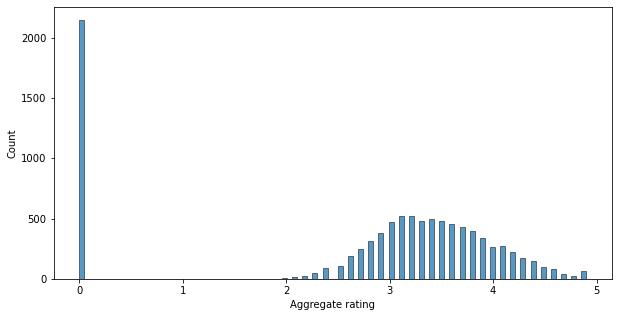

In [25]:
# Histogram for rating 
plt.figure(figsize= (10,5))
sns.histplot(x = 'Aggregate rating', data = df, bins = 100)
plt.show()

In [26]:
df.loc[(df['Aggregate rating'] < 1) & (df['Votes'] > 1)].shape

(571, 21)

571 restaurants have 1+ votes despite not having any rating. 

### Outliers

In [27]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Average Cost for 2/ Rs.
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9547.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,819.537237
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,1245.328734
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,300.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,500.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,800.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,37500.000000


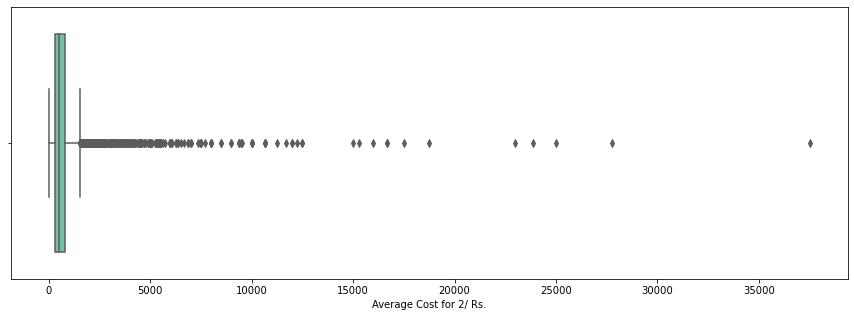

In [28]:
# Boxplot for Average Cost for 2/ Rs.
plt.figure(figsize= (15, 5))
sns.boxplot(x = 'Average Cost for 2/ Rs.', data = df,color = 'mediumaquamarine',)
plt.show()

The boxplot shows many outliers for the average price for 2. This could be explained by looking at the restaurant, price range and location - especially for values above 20000 Rs (~£200).

In [29]:
df.loc[df['Average Cost for 2/ Rs.'] > 20000]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for 2/ Rs.
24,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,4,4.9,Dark Green,Excellent,621,Phillipines,37500.0
63,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,270,Phillipines,25000.0
3477,18496057,Restaurant Andre,184,Singapore,41 Bukit Pasoh Road 089855,"Cantonment Road, Outram","Cantonment Road, Outram, Singapore",103.840360,1.279420,"French, Mediterranean, European",...,Dollar($),No,No,4,3.8,Yellow,Good,33,Singapore,27778.0
4713,18483222,Jaan,184,Singapore,"2 Stamford Road, Level 70 Equinox Complex 178882","City Hall, Downtown Core","City Hall, Downtown Core, Singapore",103.853605,1.293221,French,...,Dollar($),No,No,4,3.8,Yellow,Good,35,Singapore,23889.0
7412,6113680,Restaurant Gordon Ramsay,215,London,"68 Royal Hospital Road, Chelsea, London SW3 4HP",Chelsea,Chelsea,-0.162092,51.485509,French,...,Pounds(å£),No,No,4,4.7,Dark Green,Excellent,320,United Kingdom,23000.0


The restaurants mentioned are expected to be ~£100 per head.

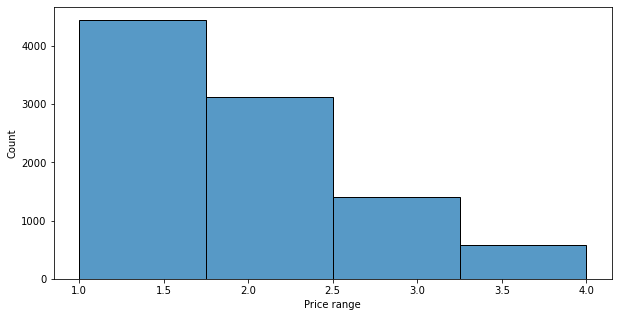

In [30]:
# Histogram for Price Range
plt.figure(figsize= (10,5))
sns.histplot(x = 'Price range', data = df, bins = 4)
plt.show()

Majority of the restaurants are in the lower range, which explains the 'average price for 2' boxplot. 

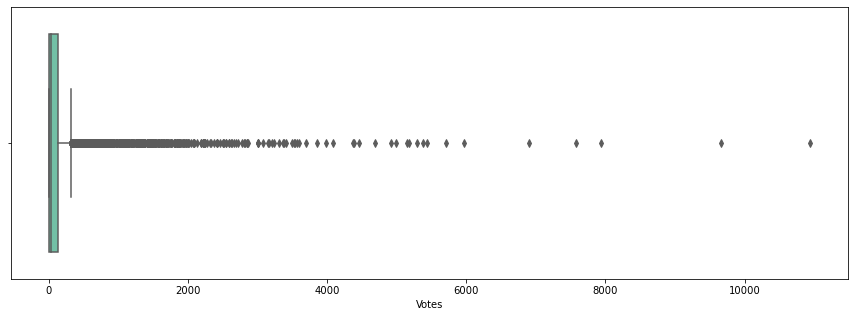

In [31]:
# Boxplot for Votes.
plt.figure(figsize= (15, 5))
sns.boxplot(x = 'Votes', data = df,color = 'mediumaquamarine',)
plt.show()

This boxplot shows extreme values for the number of votes. We can check if this is reasonable with the rating, however more info would be useful e.g. yearly average number of customers.

Additionally, restaurants with extreme number of votes are all located in India. Assuming the data was gathered from India this can also explain the presense of outliers?

In [32]:
df.Votes.quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])

0.10       0.0
0.25       5.0
0.50      31.0
0.70      97.0
0.90     379.0
0.95     699.0
0.99    1882.5
Name: Votes, dtype: float64

99% of Votes occur below 1882 , therefore 300-1882 is an appropriate **cutoff** value e.g. 1000.

In [33]:
#df.to_excel("datajoined.xlsx")

#### Treatment

In [34]:
#df.drop(df[(df['Aggregate rating'] < 1)].index, inplace=True)

In [35]:
#df.drop(df[(df['Votes'] > 1000)].index, inplace=True)

### EDA

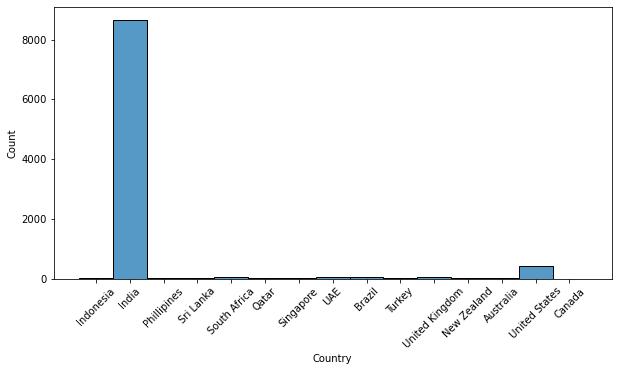

In [36]:
# Histogram for Country
plt.figure(figsize= (10,5))
sns.histplot(x = 'Country', data = df)
plt.xticks(rotation=45)
plt.show()

Geographical Distribution of Restaurants can be better seen on the complementary Tableau Dashboard. 

In [37]:
df.City.mode()

0    New Delhi
dtype: object

New Delhi is the city with the most restaurants, at 5473 in total.

In [38]:
f=df.City.value_counts()
f.loc[f ==1]

Phillip Island      1
Huskisson           1
East Ballina        1
Forrest             1
Lorn                1
Macedon             1
Beechworth          1
Mayfield            1
Penola              1
Paynesville         1
Trentham East       1
Victor Harbor       1
Clatskanie          1
Armidale            1
Fernley             1
Lakeview            1
Mc Millan           1
Vernonia            1
Dicky Beach         1
Inverloch           1
Lakes Entrance      1
Balingup            1
Cochrane            1
Yorkton             1
Flaxton             1
Randburg            1
Mohali              1
Quezon City         1
Princeton           1
Vineland Station    1
Tagaytay City       1
Panchkula           1
Ojo Caliente        1
Bandung             1
Middleton Beach     1
Winchester Bay      1
Montville           1
Palm Cove           1
Tanunda             1
Chatham-Kent        1
Consort             1
Lincoln             1
Monroe              1
Potrero             1
Weirton             1
Miller    

There are many cities with only one restaurant. 

<AxesSubplot:>

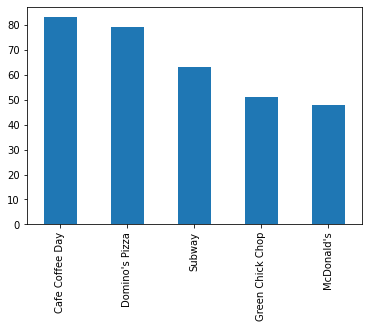

In [39]:
df['Restaurant Name'].value_counts().sort_values(ascending=False)[:5].plot(kind='bar')

'Cafe Coffee Day' has the most number of chains.

<AxesSubplot:xlabel='Restaurant Name'>

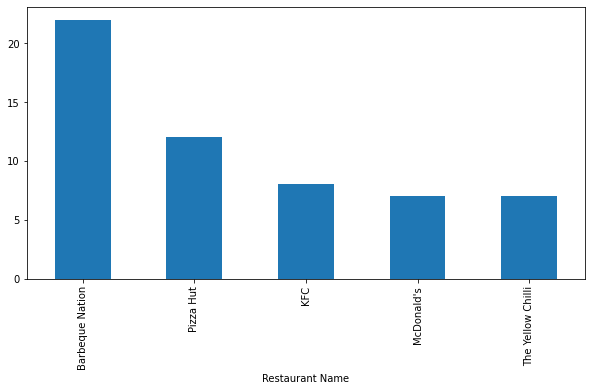

In [40]:
plt.figure(figsize= (10,5))
df.groupby('Restaurant Name')['City'].nunique().sort_values(ascending=False)[:5].plot(kind='bar')

'Barbeque Nation' has the best national presence with 22 restaurants across different cities.

In [41]:
tb=df['Has Table booking'].value_counts()
od=df['Has Online delivery'].value_counts()

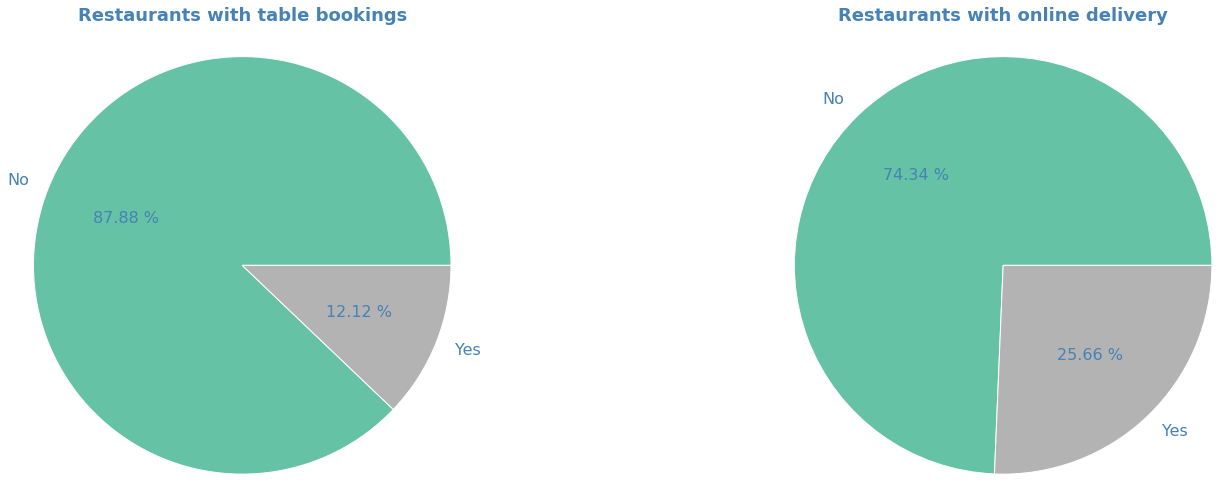

In [42]:
fig, axes = plt.subplots(1,2, figsize = (25,8))
tb.plot.pie(radius = 1.2,
           autopct = '%.2f %%',  
           textprops = {'size' : 16, 'color' : 'steelblue'},
           wedgeprops = {'edgecolor' : 'white'},
           cmap = 'Set2',  ax = axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Restaurants with table bookings\n', size = 18, color = 'steelblue', weight = 'bold')
od.plot.pie(radius = 1.2,
           autopct = '%.2f %%',  
           textprops = {'size' : 16, 'color' : 'steelblue'},
           wedgeprops = {'edgecolor' : 'white'},
           cmap = 'Set2',  ax = axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Restaurants with online delivery\n', size = 18, color = 'steelblue', weight = 'bold')
plt.show()

A large portion of restaurants have no table bookings and online delivery.<br>
The ratio of restaurants that allow bookings vs restaurants that don't is calculated to be 7.2

[Text(0, 0, '138.131'), Text(0, 0, '211.307')]

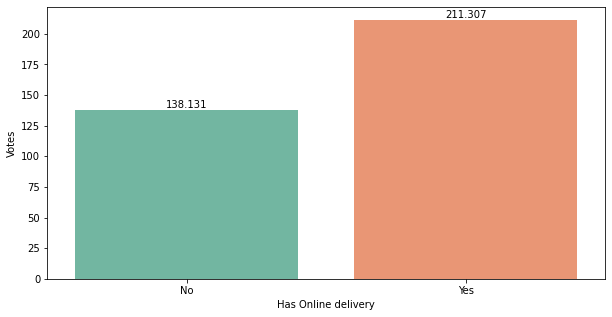

In [43]:
plt.figure(figsize= (10,5))
ax = sns.barplot(x="Has Online delivery", y="Votes", data=df,ci=None, palette ="Set2")
ax.bar_label(ax.containers[0])

The average number of votes for restaurants that deliver are higher than those that don't. 

### EDA pt2

##### 10 top cuisines across the Cities

In [44]:
cuisines_cleaned=df.Cuisines.dropna() #drop rows that had no entries for Cuisines
c_list=[]
for n in cuisines_cleaned:
    c_list.append(n.split(", ")) #create a list that contains the list of cuisines for each restaurant

In [45]:
import itertools 
flattened_list=list(itertools.chain(*c_list)) #change 2d list to 1d 

<AxesSubplot:xlabel='cuisine'>

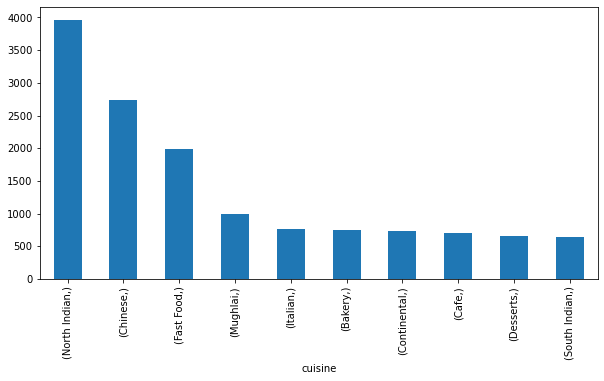

In [46]:
cdf = pd.DataFrame({'cuisine': flattened_list})
plt.figure(figsize= (10,5))
cdf.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

##### Maximum and Minimum number of cuisines served at a restaurant.

In [47]:
def find_maxmin_list(list):
    list_len = [len(i) for i in list] #finds length of each list within a list 
    print(max(list_len))
    print(min(list_len))

In [48]:
find_maxmin_list(c_list)

8
1


8 is the maximum number of cuisines a restaurants serves, however upon inspection this includes 'healthy foods' and 'beverages'.<br>
The minimum number of cuisines is 1. 

##### Most served cuisine in each City

In [49]:
from statistics import mode

In [50]:
def most_popular_cuisine(city):
    a= df.loc[df['City'] == city].Cuisines.dropna()
    cc=[]
    for n in a:
        cc.append(n.split(", "))
    new_cc=list(itertools.chain(*cc))
    print(mode(new_cc))

Change the City name in the following code to see its most popular cuisine:

In [51]:
most_popular_cuisine('New Delhi') 

North Indian


##### Creating a new file that contains the number of cuisines each restaurants serves

In [52]:
df2=df.loc[:,['Restaurant ID','City','Cuisines']]

In [53]:
df2.dropna(subset=['Cuisines'],inplace=True) 

In [54]:
df2['Cuisines'] = df2.Cuisines.apply(lambda x: x.split(', '))

In [55]:
df2["Number of Cuisines"] = df2["Cuisines"].map(lambda x:len(x))

In [56]:
#df2.to_excel("datacuisines.xlsx")

##### Identifying variables that affect rating 

In [64]:
# Add number of cuisines from df2 to df based on Restaurant ID
df3=df.join(df2.set_index('Restaurant ID'), on='Restaurant ID',how='left', lsuffix='_left', rsuffix='_right')

In [69]:
#Treating missing ratings and extreme vote values
df3.drop(df3[(df3['Aggregate rating'] < 1)].index, inplace=True)
df3.drop(df3[(df3['Votes'] > 1000)].index, inplace=True)

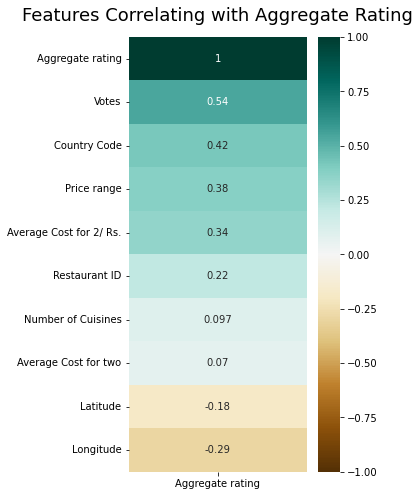

In [70]:
plt.figure(figsize=(4,8))
heatmap = sns.heatmap(df3.corr()[['Aggregate rating']].sort_values(by='Aggregate rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Aggregate Rating', fontdict={'fontsize':18}, pad=16);

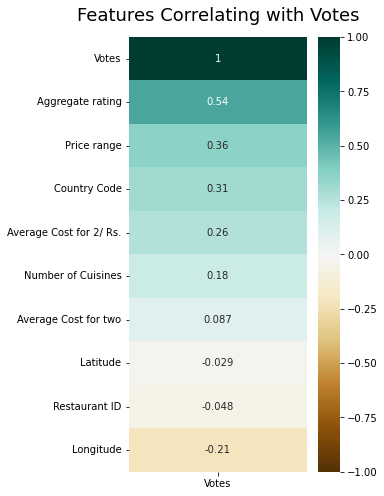

In [71]:
plt.figure(figsize=(4,8))
heatmap = sns.heatmap(df3.corr()[['Votes']].sort_values(by='Votes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Votes', fontdict={'fontsize':18}, pad=16);

This correlation map shows that some of the variables such as price range and cost may have some affect on the rating of each restaurant. However, all of these correlations are weak. 

The complementary Tableau Dashboard explores how different variable affect rating and votes.

### Machine Learning & Encoding

Tableau Dashboard includes clustering analysis 

In [57]:
#check to see where floats occur.
#print(df2.Cuisines[df2.Cuisines.map(type)==float]) 